# Instalar os programas e montar o google Drive

In [ ]:
!pip install pyabf
!pip install efel

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


INFORMAR O CAMINHO PARA A PASTA ONDE ESTAO OS ARQUIVOS A SEREM ANALISADOS:


 OBS.: recomendo deixar este arquivo_de_codigo no msm local da pasta dos arquivos

In [ ]:
cd '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/'

/content/drive/.shortcut-targets-by-id/1lMJs6OOxMh_gEFC-2der6SB0a4NRFsG3/Laboratorio Neurofisiologia/Projeto Anoxia


In [ ]:
ls -li 'P24-P27'

total 28
600 drwx------ 2 root root 4096 Aug 18 00:56 'CPT-8 100nM'/
598 drwx------ 2 root root 4096 Aug 14 18:15 'EPSCs espontâneos'/
601 drwx------ 2 root root 4096 Aug 18 03:39  HFS/
599 drwx------ 2 root root 4096 Aug 15 22:37  HPC/
597 drwx------ 2 root root 4096 Aug 14 18:15 'IPSCs espontâneos'/
602 drwx------ 2 root root 4096 Aug 28 17:12  miniEPSCs/
596 drwx------ 2 root root 4096 Aug 14 17:49 'PA- RAMP- PPS - GF'/


In [ ]:
import os
import efel
import pyabf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from scipy.signal import find_peaks
import seaborn as sns
import scipy.stats as stats


In [ ]:
rootFolder = '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/'

In [ ]:
rootFolder_controle_CPF = '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Serotonina 2/'

In [ ]:
# Definir nome do protocolo de interesse
protocolo = "Long"

times = []
voltages = []
I = []
cellnames = []
groupnames = []
groupnames2 = []
outliers = ['24722000.abf']

for idade in ['P24-P27']: # ,

  g1 = rootFolder + idade + '/PA- RAMP- PPS - GF'
  if '.' not in g1:
    print(idade)

    for g2 in os.listdir(g1):
      if '.' not in g2:
        print('\t',g2)

        for g3 in os.listdir(g1+'/'+g2):
          if '.' not in g3:
            print('\t\t',g3)


            # -------------------------------------------------------------------------------------------------------------------------- #

            cellnumber = 0
            if 'Cell 01' in os.listdir(g1+'/'+g2+'/'+g3):

              for g4 in os.listdir(g1+'/'+g2+'/'+g3):
                if 'ell' in g4 and '.' not in g4:

                  if 'ANOXIA' in g2 + g3 or 'anoxia' in g2 + g3:
                    if 'CPF' in g2 + g3:
                      grupo = 'CPF_ANOXIA'
                    else:
                      grupo = 'HPC_ANOXIA'

                  elif 'CONTROLE' in g2 + g3 or 'Controle' in g2 + g3:
                    if 'CPF' in g2 + g3:
                      grupo = 'CPF_CONTROLE'
                    else:
                      grupo = 'HPC_CONTROLE'

                  print('\t\t\t',g4, grupo)

                  # -------------------------------------------------------------------------------------------------------------------------- #

                  for g5 in os.listdir(g1+'/'+g2+'/'+g3+'/'+g4):
                    if '.abf' in g5 and g5 not in outliers:

                      firstREO = 0

                      cell = g4

                      filename = g5

                      abf = pyabf.ABF(g1+'/'+g2+'/'+g3+'/'+cell+'/'+filename)

                      fs = abf.dataRate

                      if protocolo in abf.protocol and 'HPC' in grupo and idade+'_'+grupo+'_'+cell not in groupnames2:

                          ############################################
                          # Save Data and plot
                          ############################################

                          print(abf.protocol)
                          print(abf.sweepList)

                          print(grupo+'/'+cell+'/'+filename, abf.protocol, abf.sweepList)
                          # print(abf)

                          plt.figure(figsize=(15, 4))

                          cellnumber = cellnumber + 1
                          celname = 'Cell ' + str(cellnumber)

                          IpA = -130
                          for i in abf.sweepList: # GUI>> modf p dados do gui (muitos steps)

                              abf.setSweep(i, channel=0)
                              IpA = IpA + 20.0

                              peaks, peaksV = find_peaks(abf.sweepY, height=0, distance=40) # V > 0 mV and ISI > 2 ms (at 20kHz)
                              peak_count = len(peaks)

                              if peak_count >= 3 and firstREO == 0:

                                I.append((-110+20*i + abf.sweepC))
                                times.append(abf.sweepX)
                                voltages.append(abf.sweepY)
                                cellnames.append(celname)
                                groupnames.append(idade+'_'+grupo+'_'+cell+'_'+filename)
                                groupnames2.append(idade+'_'+grupo+'_'+cell)

                                firstREO = firstREO + 1

                                plt.plot(abf.sweepX, abf.sweepY, alpha=.95, color = 'blue', linewidth=1.5,
                                          label="I=  %.0f pA" % (IpA))
                                plt.plot(abf.sweepX[peaks], abf.sweepY[peaks], 'o')
                                # b, a = signal.butter(4, 0.05, "low")
                                # current_filtered = signal.filtfilt(b, a, abf.sweepY, padlen=150)
                                # plt.plot(abf.sweepX, current_filtered, alpha=.5, color='r', linewidth=2.5,
                                #           label="I=  %.0f pA" % (IpA))
                                plt.legend()
                                plt.xlim(0,1.100)
                                plt.xlabel('Time (ms)')
                                plt.ylabel('Voltage (mV)')
                                # plt.ylim(min(abf.sweepY[5000:15000])-5.0,min(abf.sweepY[5000:15000])+50)
                                plt.title(celname + ": "+(filename))

                          plt.show()
                          plt.close()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
allcells, allcont = np.unique(cellnames,return_counts = True)

In [ ]:
allcells, allcont

(array(['Cell 1', 'Cell 10', 'Cell 11', ..., 'Cell 7', 'Cell 8', 'Cell 9'],
       dtype='<U7'),
 array([2, 2, 2, ..., 2, 2, 2]))

In [ ]:
allgroups, allcont = np.unique(groupnames,return_counts = True)

allgroups[0], allcont[0]/1, allgroups[30], allcont[1]/1

('P24-P27_HPC_ANOXIA_Cell 01_24506000.abf',
 1.0,
 'P24-P27_HPC_CONTROLE_Cell 01_24505049.abf',
 1.0)

In [ ]:
len(allgroups[0:30]), len(allgroups[30:])

(30, 39)

In [ ]:
############################################
# Analise eFEL (do Blue Brain Project)
############################################
traces = []

for ii in range(0, len(voltages)):  # MUDEI, era anf.sweepList
    trace = {'T': 1000.0*times[ii], 'V': voltages[ii],
            'I': I[ii],
            'stim_start': [17.2], 'stim_end': [1017.2]}
    traces.append(trace)

Lista_de_medidas = ['time_constant', 'voltage_base', 'steady_state_voltage_stimend', 'time_to_first_spike', 'Spikecount','mean_frequency', 'sag_amplitude',
                                        'sag_time_constant', 'steady_state_voltage', 'minimum_voltage',
                                        'all_ISI_values', 'peak_time', 'peak_voltage', 'AP_amplitude', 'AP_begin_time', 'AP_begin_width', 'AP_duration_half_width',
                                        'min_AHP_values', 'AP_fall_time', 'AP_height', 'AP_rise_time', 'ADP_peak_amplitude', 'ADP_peak_values', 'AHP_depth', 'AHP_depth_abs',
                                        'AHP_depth_abs_slow', 'AHP_depth_from_peak', 'AHP_depth_slow', 'AHP_time_from_peak',
                                        'voltage_deflection', 'decay_time_constant_after_stim', 'sag_ratio1',
                                        'ISI_CV', 'adaptation_index']

# Optional: You can adjust the parameters for the calculation of the time constant
efel.set_setting("Threshold", 0.0)
# efel.setDoubleSetting('decay_start_after_stim', 0)  # default = 1 ms
# efel.setDoubleSetting('decay_end_after_stim', 30)  # default = 10 ms

feature_values = efel.get_feature_values(traces, Lista_de_medidas, raise_warnings=False);

for ii in range(0, len(voltages)):
  try:
    feature_values[ii]['AHP_depth_last'] = feature_values[ii]['AHP_depth'][-1:]
    feature_values[ii]['AHP_time_from_peak_last'] = feature_values[ii]['AHP_time_from_peak'][-1:]
  except:
    feature_values[ii]['AHP_depth_last'] = feature_values[ii]['AHP_depth']
    feature_values[ii]['AHP_time_from_peak_last'] = feature_values[ii]['AHP_time_from_peak']

Lista_de_medidas.append('AHP_depth_last')
Lista_de_medidas.append('AHP_time_from_peak_last')

In [ ]:
ii = 25
I[ii],times[ii],voltages[ii],cellnames[ii],groupnames[ii],groupnames2[ii], feature_values[ii]

(array([150., 150., 150., ..., 150., 150., 150.]),
 array([0.    , 0.0001, 0.0001, ..., 1.0998, 1.0999, 1.0999]),
 array([-62.6526, -62.7747, -62.7136, ..., -62.1948, -61.9507, -61.8896],
       dtype=float32),
 'Cell 26',
 'P24-P27_HPC_CONTROLE_Cell 29_24801033.abf',
 'P24-P27_HPC_CONTROLE_Cell 29',
 {'time_constant': array([1.1896]),
  'voltage_base': array([-62.5983]),
  'steady_state_voltage_stimend': array([-46.8467]),
  'time_to_first_spike': array([36.1]),
  'Spikecount': array([3]),
  'mean_frequency': array([3.8895]),
  'sag_amplitude': None,
  'sag_time_constant': None,
  'steady_state_voltage': array([-60.38]),
  'minimum_voltage': array([-61.615]),
  'all_ISI_values': array([113.5, 621.7]),
  'peak_time': array([ 53.3, 166.8, 788.5]),
  'peak_voltage': array([53.4668, 51.9409, 52.002 ]),
  'AP_amplitude': array([97.0154, 92.2852, 91.3696]),
  'AP_begin_time': array([ 52.8, 166.3, 788. ]),
  'AP_begin_width': array([2.6, 2.5, 2.3]),
  'AP_duration_half_width': array([0.9, 0.

In [ ]:
# Set the columns of the output table
table = pd.DataFrame(columns=['cell',
                              'current_pA',
                              'group',
                              'voltage_base',
                              'steady_state_voltage_stimend',
                              'voltage_delta',
                              'voltage_deflection',
                              'time_constant',
                              'decay_time_constant_after_stim',
                              'capacitance_pF',
                              'sag_amplitude',
                              'sag_ratio1'])

In [ ]:
group = [grp.split('_')[2] for grp in groupnames2]
idade = [grp.split('_')[0] for grp in groupnames2]
regiao = [grp.split('_')[1] for grp in groupnames2]

In [ ]:
for ii in range(0, len(voltages)):
    length = len(table)

    table.loc[ii, 'cell'] = cellnames[ii]
    table.loc[ii, 'current_pA'] = I[ii][0]
    table.loc[ii, 'group'] =  group[ii]
    table.loc[ii, 'idade'] =  idade[ii]
    table.loc[ii, 'regiao'] =  regiao[ii]
    table.loc[ii, 'voltage_base'] = feature_values[ii]['voltage_base'][0]
    table.loc[ii, 'steady_state_voltage_stimend'] = feature_values[ii]['steady_state_voltage_stimend'][0]
    table.loc[ii, 'voltage_delta'] = (feature_values[ii]['steady_state_voltage_stimend'][0] - feature_values[ii]['voltage_base'][0])
    table.loc[ii, 'voltage_deflection'] = feature_values[ii]['voltage_deflection'][0]
    table.loc[ii, 'decay_time_constant_after_stim'] = feature_values[ii]['decay_time_constant_after_stim'][0]


    if I[ii][0] < -30.0:
        table.loc[ii, 'sag_amplitude'] = feature_values[ii]['sag_amplitude'][0]
        table.loc[ii, 'sag_ratio1'] = feature_values[ii]['sag_ratio1'][0]
        table.loc[ii, 'input_resistance_Gohm'] = (table.loc[ii, 'voltage_delta']
                                                      /table.loc[ii, 'current_pA'])

        if (feature_values[ii]['decay_time_constant_after_stim'] is not None):
            table.loc[ii, 'time_constant'] = feature_values[ii]['decay_time_constant_after_stim'][0]
            table.loc[ii, 'capacitance_pF'] = (feature_values[ii]['decay_time_constant_after_stim']
                                                   /table.loc[ii, 'input_resistance_Gohm'])[0]

In [ ]:
table

,cell,current_pA,group,voltage_base,steady_state_voltage_stimend,voltage_delta,voltage_deflection,time_constant,decay_time_constant_after_stim,capacitance_pF,sag_amplitude,sag_ratio1,idade,regiao,input_resistance_Gohm
0,Cell 1,-110.0,CONTROLE,-73.69656,-85.053711,-11.357151,-11.799295,9.833021,9.833021,95.238001,3.294678,0.224865,P24-P27,HPC,0.103247
1,Cell 1,-90.0,CONTROLE,-73.35239,-83.211365,-9.858975,-10.02977,8.854307,8.854307,80.828649,2.756653,0.218511,P24-P27,HPC,0.109544
2,Cell 1,-70.0,CONTROLE,-73.488024,-81.420197,-7.932173,-8.237559,9.132854,9.132854,80.59579,1.953827,0.197636,P24-P27,HPC,0.113317
3,Cell 1,-50.0,CONTROLE,-73.71521,-79.465942,-5.750732,-5.711621,7.590044,7.590044,65.991975,2.046509,0.262466,P24-P27,HPC,0.115015
4,Cell 1,-30.0,CONTROLE,-74.03734,-77.214417,-3.177077,-3.646586,NaN,14.246994,NaN,NaN,NaN,P24-P27,HPC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,Cell 30,90.0,ANOXIA,-66.694472,-53.934357,12.760115,13.2441,NaN,19.6969,NaN,NaN,NaN,P24-P27,HPC,NaN
1031,Cell 30,110.0,ANOXIA,-67.030165,-48.098419,18.931746,15.771661,NaN,21.818865,NaN,NaN,NaN,P24-P27,HPC,NaN
1032,Cell 30,130.0,ANOXIA,-65.845066,-46.314758,19.530307,16.498932,NaN,17.72816,NaN,NaN,NaN,P24-P27,HPC,NaN
1033,Cell 30,150.0,ANOXIA,-66.289266,-45.481384,20.807882,18.128747,NaN,17.588268,NaN,NaN,NaN,P24-P27,HPC,NaN


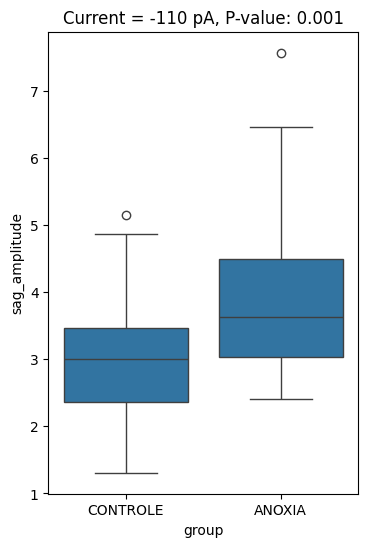

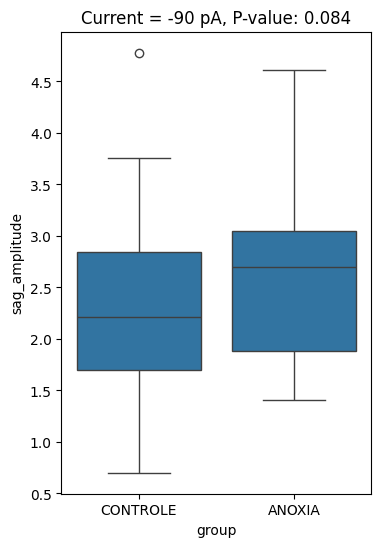

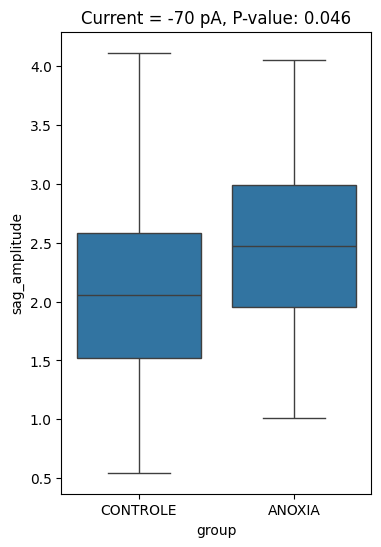

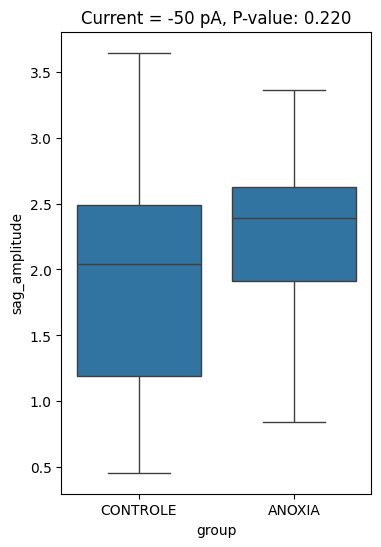

In [ ]:
# prompt: create boxplot comparing 'sag_amplitude' between the 'group'  "CONTROLE" and "ANOXIA" for "current_pA" = -70 and include test significance


# Fig = plt.figure(figsize=(4, 6))

# Filter data for current_pA = -70
for ii,current_pA in enumerate([-110, -90, -70, -50]):

    data_filtered = table[(table['current_pA'] == current_pA) & (table['group'].isin(['CONTROLE', 'ANOXIA']))]

    # Perform t-test
    control_data = data_filtered[data_filtered['group'] == 'CONTROLE']['sag_amplitude'].astype(float) # Convert to numeric type
    anoxia_data = data_filtered[data_filtered['group'] == 'ANOXIA']['sag_amplitude'].astype(float) # Convert to numeric type
    t_stat, p_value = stats.ttest_ind(control_data, anoxia_data)

    # print(f"T-statistic: {t_stat:.2f}")
    # print(f"P-value: {p_value:.3f}")

    # plt.subplot(1, 4, ii+1)
    Fig = plt.figure(figsize=(4, 6))
    plt.title(f"Current = {current_pA} pA, P-value: {p_value:.3f}")


    # Create boxplot
    sns.boxplot(x='group', y='sag_amplitude', data=data_filtered)
    plt.show()


In [ ]:
Control = table.get(table["group"] == "CONTROLE")
DHB = table.get(table["group"] == "ANOXIA")
Control

,cell,current_pA,group,voltage_base,steady_state_voltage_stimend,voltage_delta,voltage_deflection,time_constant,decay_time_constant_after_stim,capacitance_pF,sag_amplitude,sag_ratio1,idade,regiao,input_resistance_Gohm
0,Cell 1,-110.0,CONTROLE,-73.69656,-85.053711,-11.357151,-11.799295,9.833021,9.833021,95.238001,3.294678,0.224865,P24-P27,HPC,0.103247
1,Cell 1,-90.0,CONTROLE,-73.35239,-83.211365,-9.858975,-10.02977,8.854307,8.854307,80.828649,2.756653,0.218511,P24-P27,HPC,0.109544
2,Cell 1,-70.0,CONTROLE,-73.488024,-81.420197,-7.932173,-8.237559,9.132854,9.132854,80.59579,1.953827,0.197636,P24-P27,HPC,0.113317
3,Cell 1,-50.0,CONTROLE,-73.71521,-79.465942,-5.750732,-5.711621,7.590044,7.590044,65.991975,2.046509,0.262466,P24-P27,HPC,0.115015
4,Cell 1,-30.0,CONTROLE,-74.03734,-77.214417,-3.177077,-3.646586,NaN,14.246994,NaN,NaN,NaN,P24-P27,HPC,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,Cell 39,90.0,CONTROLE,-61.716715,-45.922241,15.794474,18.260308,NaN,16.900124,NaN,NaN,NaN,P24-P27,HPC,NaN
581,Cell 39,110.0,CONTROLE,-62.615289,-45.988464,16.626824,16.21443,NaN,16.819027,NaN,NaN,NaN,P24-P27,HPC,NaN
582,Cell 39,130.0,CONTROLE,-61.948988,-45.077423,16.871565,19.419376,NaN,13.755936,NaN,NaN,NaN,P24-P27,HPC,NaN
583,Cell 39,150.0,CONTROLE,-61.840481,-43.041565,18.798916,15.80994,NaN,12.416119,NaN,NaN,NaN,P24-P27,HPC,NaN


In [ ]:
ls 'Analises_Fernando'

 ANALISES_FERNANDO_ATIVAS_p25.ipynb     Anx_p25_passivas_-90pA.csv
 ANALISES_FERNANDO_PASSIVAS_p15.ipynb   Anx_p25_passivas.csv
 ANALISES_FERNANDO_PASSIVAS_PFC.ipynb  'Copy of ANALISES_FERNANDO_PASSIVAS_p25.ipynb'
 ANALISES_PASSIVAS_LUCAS.ipynb          Ctl_p15_passivas_-70pA.csv
 Anx_p15_passivas_-70pA.csv             Ctl_p15_passivas_-90pA.csv
 Anx_p15_passivas_-90pA.csv             Ctl_p15_passivas.csv
 Anx_p15_passivas_-90pA.gsheet          Ctl_p25_passivas_-70pA.csv
 Anx_p15_passivas.csv                   Ctl_p25_passivas_-90pA.csv
 Anx_p15_passivas.gsheet                Ctl_p25_passivas.csv
 Anx_p25_passivas_-70pA.csv


In [ ]:
# DHB.to_csv('Analises_Fernando/Anx_p25_ativas.csv')
# # DHB.get(DHB["current_pA"] == -110).to_csv('Analises_Fernando/Anx_p25_ativas_-110pA.csv')
# DHB.get(DHB["current_pA"] == -90).to_csv('Analises_Fernando/Anx_p25_ativas_-90pA.csv')
# DHB.get(DHB["current_pA"] == -70).to_csv('Analises_Fernando/Anx_p25_ativas_-70pA.csv')

In [ ]:
# Control.to_csv('Analises_Fernando/Ctl_p25_ativas.csv')
# # Control.get(Control["current_pA"] == -110).to_csv('Analises_Fernando/Ctl_p25_ativas_-110pA.csv')
# Control.get(Control["current_pA"] == -90).to_csv('Analises_Fernando/Ctl_p25_ativas_-90pA.csv')
# Control.get(Control["current_pA"] == -70).to_csv('Analises_Fernando/Ctl_p25_ativas_-70pA.csv')

In [ ]:
ls

 Analises_Fernando/  'Anóxia em slice'/   P14-P17/   P24-P27/  'Projeto da Beatriz'/


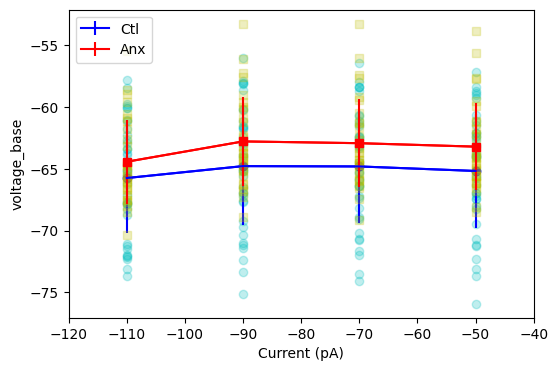

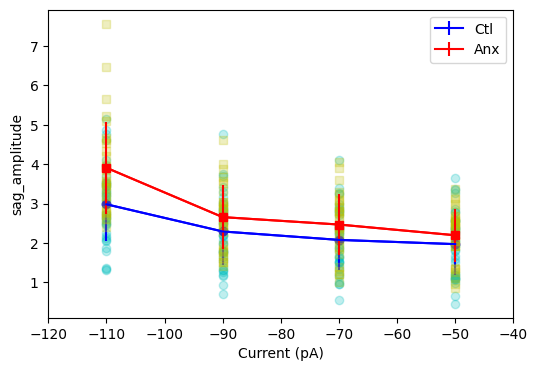

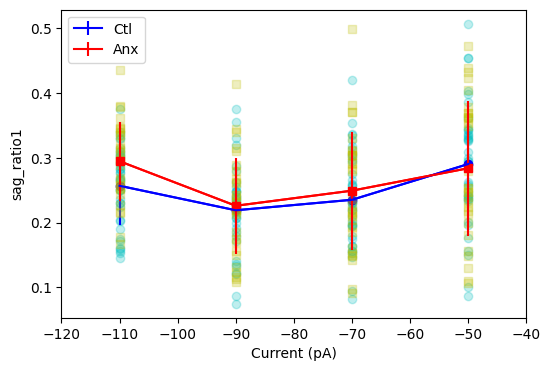

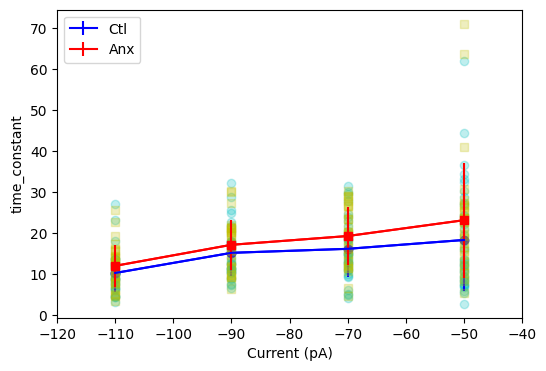

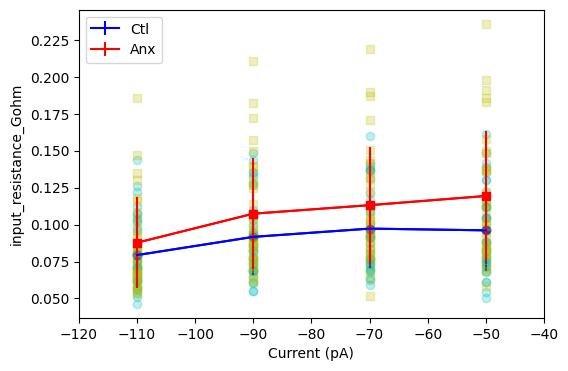

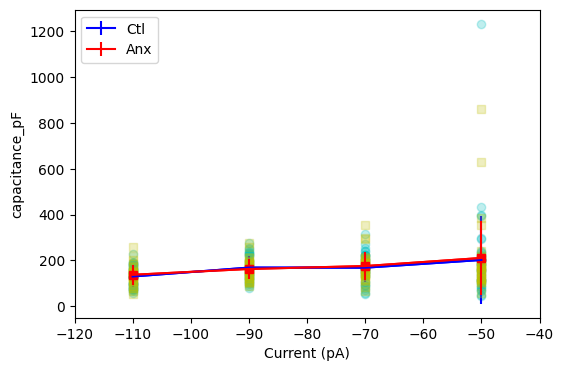

In [ ]:
for parameterName in  ["voltage_base", "sag_amplitude", 'sag_ratio1', 'time_constant', 'input_resistance_Gohm', 'capacitance_pF']:

    plt.figure(figsize=(6, 4))

    Iinit = -110
    Ifinal = -50
    I_range = [j for j in range(Iinit,Ifinal+1,20)]
    Inumber = len(I_range)

    parameter = list(Control[parameterName].get((Control["current_pA"] >= Iinit) & (Control["current_pA"] <= Ifinal)))

    VxI = []
    for i in range(39):
      plt.plot(I_range,parameter[i*Inumber:(i+1)*Inumber],'co', alpha=0.25)
      VxI.append(np.array(parameter[i*Inumber:(i+1)*Inumber]))

    plt.plot(I_range, np.mean(VxI, axis=0),'b-o')
    plt.errorbar(I_range, np.mean(VxI, axis=0), np.std(VxI, axis=0), color = "blue", label="Ctl")


    parameter = list(DHB[parameterName].get((DHB["current_pA"] >= Iinit) & (DHB["current_pA"] <= Ifinal)))

    VxI2 = []
    for i in range(30):
      plt.plot(I_range,parameter[i*Inumber:(i+1)*Inumber],'ys', alpha=0.25)
      VxI2.append(np.array(parameter[i*Inumber:(i+1)*Inumber]))

    plt.plot(I_range, np.mean(VxI2, axis=0),'r-s')
    plt.errorbar(I_range, np.mean(VxI2, axis=0), np.std(VxI2, axis=0), color = "red", label="Anx")


    plt.xlabel('Current (pA)')
    plt.ylabel(parameterName)
    plt.xlim(Iinit-10, Ifinal+10)
    plt.legend();

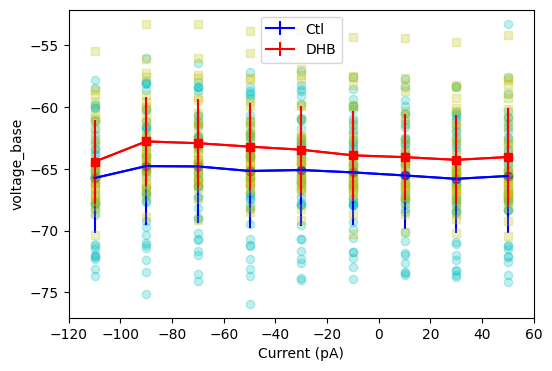

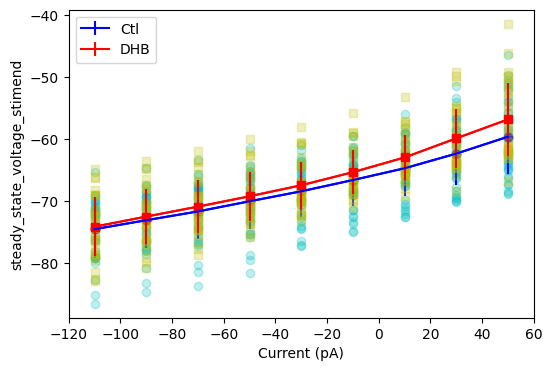

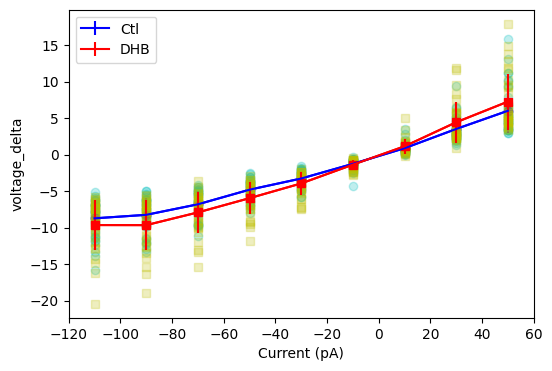

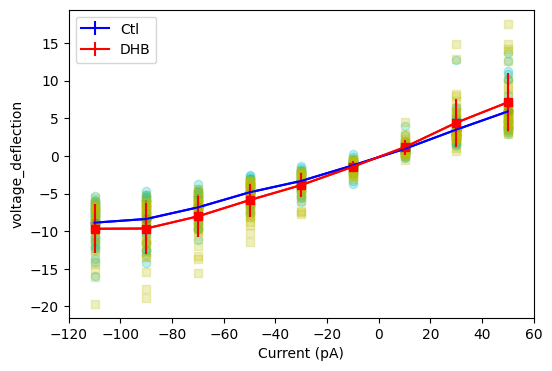

In [ ]:
for parameterName in  ["voltage_base", 'steady_state_voltage_stimend', 'voltage_delta', 'voltage_deflection']:

    plt.figure(figsize=(6, 4))

    Iinit = -110
    Ifinal = 50
    I_range = [j for j in range(Iinit,Ifinal+1,20)]
    Inumber = len(I_range)

    parameter = list(Control[parameterName].get((Control["current_pA"] >= Iinit) & (Control["current_pA"] <= Ifinal)))

    VxI = []
    for i in range(39):
      plt.plot(I_range,parameter[i*Inumber:(i+1)*Inumber],'co', alpha=0.25)
      VxI.append(np.array(parameter[i*Inumber:(i+1)*Inumber]))

    plt.plot(I_range, np.mean(VxI, axis=0),'b-o')
    plt.errorbar(I_range, np.mean(VxI, axis=0), np.std(VxI, axis=0), color = "blue", label="Ctl")


    parameter = list(DHB[parameterName].get((DHB["current_pA"] >= Iinit) & (DHB["current_pA"] <= Ifinal)))

    VxI2 = []
    for i in range(30):
      plt.plot(I_range,parameter[i*Inumber:(i+1)*Inumber],'ys', alpha=0.25)
      VxI2.append(np.array(parameter[i*Inumber:(i+1)*Inumber]))

    plt.plot(I_range, np.mean(VxI2, axis=0),'r-s')
    plt.errorbar(I_range, np.mean(VxI2, axis=0), np.std(VxI2, axis=0), color = "red", label="DHB")


    plt.xlabel('Current (pA)')
    plt.ylabel(parameterName)
    plt.xlim(Iinit-10, Ifinal+10)
    plt.legend();

In [ ]:
# for ii in range(0, len(voltages)):
#   try:
#     feature_values[ii]['AHP_depth_last'] = feature_values[ii]['AHP_depth'][-1:]
#     feature_values[ii]['AHP_time_from_peak_last'] = feature_values[ii]['AHP_time_from_peak'][-1:]
#   except:
#     feature_values[ii]['AHP_depth_last'] = feature_values[ii]['AHP_depth']
#     feature_values[ii]['AHP_time_from_peak_last'] = feature_values[ii]['AHP_time_from_peak']
# Lista_de_medidas.append('AHP_depth_last')
# Lista_de_medidas.append('AHP_time_from_peak_last')

In [ ]:
feature_values[0]

In [ ]:
abf = pyabf.ABF('/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 10/24428062.abf')

In [ ]:
 ls '/content/drive/MyDrive/Laboratorio Neurofisiologia/Projeto Anoxia/P14-P17/PA- RAMP- PPS - GF/ANOXIA/HPC/Cell 01'

In [ ]:
# Update: It is more convenient to set all the input parameters at the beginning
sweeps = abf.sweepList[0:15]     # Remove the square brackets if you want to select all the sweeps
stim_start = 17.2                 # beginning of the current stimulus in miliseconds
stim_end = 1017.2                   # end of the current stimulus in miliseconds
sampling_freq = 20000
currentstep_time = int(0.4 * sampling_freq) # type a time point (s) within a current step
# Define the range of current steps to calculate the input resistance from
ir_current_begin = -110           # current step in pA
ir_current_end = 170               # current step in pA

# Set the columns of the output table
table = pd.DataFrame(columns=['voltage',
                              'steady_state_voltage_stimend',
                              'voltage_delta',
                              'current_pA',
                              'input_resistance_Gohm',
                              'time_constant',
                              'capacitance_pF',
                              'sag_amplitude',
                              'sag_ratio1'])

# Loop function
for sweep in sweeps:  # To select a ranfe of traces
    abf.setSweep(sweep)
    # Defines a trace and region of analysis
    trace = {'T': abf.sweepX*1000, # convert to ms
             'V': abf.sweepY,
             'I': (-110+20*sweep + abf.sweepC),
             'stim_start' : [stim_start],
             'stim_end' : [stim_end]}
    traces = [trace]

    # Optional: You can adjust the parameters for the calculation of the time constant
    # efel.api.setDoubleSetting('decay_start_after_stim', 0)  # default = 1 ms
    # efel.api.setDoubleSetting('decay_end_after_stim', 30)  # default = 10 ms

    # Output features
    feature_values = efel.getFeatureValues(traces,
                                           ['voltage',
                                            'steady_state_voltage_stimend',
                                            'current',
                                            'decay_time_constant_after_stim',
                                            'sag_amplitude',
                                            'sag_ratio1'],
                                           raise_warnings=None)[0] # If true, returns warnings

    # Create table from the results
    # Use [0] to extract the values from the Spikecount array
    length = len(table)
    table.loc[length, 'voltage'] = feature_values['voltage'][0]
    table.loc[length, 'steady_state_voltage_stimend'] = feature_values['steady_state_voltage_stimend'][0]
    table.loc[length, 'voltage_delta'] = (feature_values['steady_state_voltage_stimend']
                                          - feature_values['voltage'])[0]
    table.loc[length, 'current_pA'] = feature_values['current'][currentstep_time] # [:] current step
    table.loc[length, 'sag_amplitude'] = feature_values['sag_amplitude']
    table.loc[length, 'sag_ratio1'] = feature_values['sag_ratio1']

    if (table.loc[length, 'current_pA']  >= ir_current_begin) & (table.loc[length, 'current_pA']  < ir_current_end):
        table.loc[length, 'input_resistance_Gohm'] = (table.loc[length, 'voltage_delta']
                                                      /table.loc[length, 'current_pA'])
        if (feature_values['decay_time_constant_after_stim'] is not None):
            table.loc[length, 'time_constant'] = feature_values['decay_time_constant_after_stim'][0]
            table.loc[length, 'capacitance_pF'] = (feature_values['decay_time_constant_after_stim']
                                                   /table.loc[length, 'input_resistance_Gohm'])[0]

In [ ]:
table

In [ ]:
ir_index_begin = 0               # index (position) of the current step
ir_index_end = 15                # index (position) of the current step

# Optional plotting: example with three subplots
fig = plt.figure(figsize=(12, 4))
fig.tight_layout()

# I-V curve plot
ax1 = fig.add_subplot(1, 2, 1)
# Get current value from a time point within current step
currents = []
for sweep in sweeps:
    abf.setSweep(sweep)
    currents.append((-110+20*sweep))
x = currents
y = table.loc[:,'steady_state_voltage_stimend']
y_list = y.values.tolist()
x_ir = x[ir_index_begin:ir_index_end]
y_ir = y_list[ir_index_begin:ir_index_end]
m, b = np.polyfit(x_ir, y_ir, 1)
line = np.polyval([m, b], x_ir)
ax1.plot(x_ir, line, color='magenta')
ax1.scatter(x, y, color='gray')
ax1.set_xlabel('Current (pA)')
ax1.set_ylabel('Voltage (mV)')

# Voltage traces plot
ax2 = fig.add_subplot(2, 2, 2)
for sweep in sweeps:
    abf.setSweep(sweep)
    ax2.plot(abf.sweepX*1000, abf.sweepY, alpha=0.3)
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Membrane voltage (mV)')
ax2.axes.set_xlim(0, 1100)  # set the x-axis range if necessary

# Current steps plot
ax3 = fig.add_subplot(2, 2, 4, sharex=ax2)
for sweep in sweeps:
    abf.setSweep(sweep)
    ax3.plot(abf.sweepX*1000, (-110+20*sweep + abf.sweepC), alpha=0.3)
ax3.set_xlabel('Time (ms)')
ax3.set_ylabel('Current (pA)')
ax3.axes.set_xlim(0, 1100)  # set the x-axis range if necessary

# Display the graph and the table
print ("Input resitance (GOhm) =", m)
plt.show()
table

https://spikesandbursts.wordpress.com/2022/05/13/patch-clamp-analysis-clampfit-passive-properties/

In [ ]:
from scipy.optimize import curve_fit
# Set the default parameters after the non-default arguments
def passive_memb_properties (voltage,
                             time,
                             current,
                             fs,
                             cursor3_ms,
                             cursor4_ms,
                             cursor5_ms,
                             a_initial,
                             tau_initial,
                             c_initial,
                             cursor1_ms=5,
                             cursor2_ms=50):
    """
    Inputs:
    voltage = voltage trace, raw or pre-processed
    time = time trace
    current = current trace
    cursor3_ms = Time cursor position in ms set at the peak of the capacitive transient.
    cursor4_ms = Time cursor position in ms set at the end of the capacitive transient.
    cursor5_ms = Time cursor position in ms set at the end of the voltage step.
    a_initial = initial estimate for exponential fitting.
    tau_initial = initial estimate for exponential fitting.
    c_initial = initial estimate for exponential fitting.

    Returns:
    rmp: Resting membrane potential
    current_steps: Current step values
    voltage_delta: Delta voltage response to current step between cursor 3 and 4
    steady_voltage: Steady voltage response between cursor 4 and 5
    ir: Input resistance in MOhm
    tau: Decay time constant in ms
    r_squared: Quality of the exponential fitting
    capacitance: Capacitance of the passive membrane in pF
    """

    # Create table
    table = pd.DataFrame(columns=['rmp_mV',
                                  'current_steps_pA',
                                  'V_delta_mV',
                                  'Rin_MOhm',
                                  'tau_ms',
                                  'tau_R squared',
                                  'capacitance_pF'])

    # Position of cursors in time bins (depends on sampling frequency)
    global cursor2, cursor3, cursor4, cursor5
    cursor1 = int(cursor1_ms * (fs/1000))
    cursor2 = int(cursor2_ms * (fs/1000))
    cursor3 = int(cursor3_ms * (fs/1000))
    cursor4 = int(cursor4_ms * (fs/1000))
    cursor5 = int(cursor5_ms * (fs/1000))

    # steady voltage response
    # global steady_voltage
    steady_voltage = np.average(voltage[cursor4:cursor5])

    # Resting membrane potential
    rmp = np.average(voltage[cursor1:cursor2])

    # Get the current step values
    current_steps = np.average(current[cursor4:cursor5])

    # Delta voltage response to current step
    voltage_delta = np.average(voltage[cursor4:cursor5]) - rmp

    # Input resistance
    ir = abs(voltage_delta/current_steps)*1000

    # Calculate tau from decay time constant
    decay_voltage = voltage[cursor3:cursor4]
    decay_time = (time[cursor3:cursor4])*1000
    decay_voltage = decay_voltage[~np.isnan(decay_voltage)]
    decay_time = decay_time[~np.isnan(decay_time)]

    # Initial values (a, tau, c) for estimating the fitting
    a_initial = a_initial      # Initial value
    tau_initial = tau_initial  # Estimated tau
    c_initial = c_initial      # Baseline value
    # popt: optimal values for the parameters
    # pcov: estimated covariance of popt
    global a, tau, c
    popt, pcov = curve_fit(lambda t, a, tau, c: a * np.exp(-t/tau) + c,
                           xdata = decay_time,     # x-data
                           ydata = decay_voltage,  # y-data
                           p0 = (a_initial, tau_initial, c_initial))
    a = popt[0]
    tau = popt[1]
    c = popt[2]

    # Quality of the exponential fitting
    # RSS: Residual sum of squares
    RSS = np.square(decay_voltage - (a * np.exp(-decay_time/tau) + c))
    # TSS: total sum of squares
    TSS = np.square(decay_voltage - np.mean(decay_voltage))
    r_squared = 1 - np.sum(RSS) / np.sum(TSS)

    # capacitance
    capacitance = (tau/ir) * 1000

    return {'rmp':rmp,
            'current_steps': current_steps,
            'voltage_delta': voltage_delta,
            'steady_voltage': steady_voltage,
            'ir': ir,
            'tau': tau,
            'r_squared': r_squared,
            'capacitance': capacitance}

In [ ]:
# Create a list the position of cursors in ms
cursors_ms = [5, 10, 17.2, 167.2, 600]

# Sampling frequency
fs = 20000

# Initial estimation for exponential fitting
a_initial = -71   # RMP
tau_initial = 20  # Estimated tau
c_initial = 0     # Steady voltage

# Create table with results
table = pd.DataFrame()
# Number of decimals in the table
pd.options.display.float_format = '{:.4f}'.format

for sweep in abf.sweepList[0: 5]:  # [0: 4] to select a range of traces
    abf.setSweep(sweep)
    # Call the function 'passive_memb_properties'
    features = passive_memb_properties(voltage = abf.sweepY,
                                       time = abf.sweepX,
                                       current = (-110+20*sweep + abf.sweepC),
                                       fs = fs,
                                       cursor3_ms=cursors_ms[2],
                                       cursor4_ms=cursors_ms[3],
                                       cursor5_ms=cursors_ms[4],
                                       a_initial=a_initial,
                                       tau_initial=tau_initial,
                                       c_initial=c_initial)

    length = len(table)
    table.loc[length, 'rmp_mV'] = features['rmp']
    table.loc[length, 'current_steps_pA'] = features['current_steps']
    table.loc[length, 'V_delta_mV'] = features['voltage_delta']
    table.loc[length, 'V_steady_mV'] = features['steady_voltage']
    if table.loc[length, 'current_steps_pA'] != 0:
        table.loc[length, 'Rin_MOhm'] = features ['ir']
        table.loc[length, 'tau_ms'] = features['tau']
        table.loc[length, 'tau_R squared'] = features['r_squared']
        table.loc[length, 'capacitance_pF'] = features['capacitance']


# Plotting (optional): general settings
fig = plt.figure(figsize=(18, 5))  # Figure size
plt.rcParams.update({'font.size': 12})  # Font size

# Graph 1: Raw traces
ax1 = fig.add_subplot(131)
ax1.set_title('Graph 1: Raw traces')
for sweep in abf.sweepList[0: 5]:
    abf.setSweep(sweep)
    voltage = abf.sweepY
    time = abf.sweepX*1000
    ax1.plot(time, voltage)

# Labels for cursors 1 to 5
ax1top= ax1.secondary_xaxis('top')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Voltage (mV)')
ax1.set_xlim(0, 1000)   # limit the x range to display

# Loop to plot cursor dotted lines 1 to 5
for i, cursor in enumerate(cursors_ms):
    ax1.axvline(cursor, linestyle="dotted", color='gray', label=str(i+1))

# Cursors' tick and labels
ax1top.set_xticks(cursors_ms)
ax1top.set_xticklabels(['1', '2', '3', '4', '5'])


# Graph 2: Voltage decay and tau fitting
ax2 = fig.add_subplot(132)
ax2.set_title('Graph 2: Tau fitting')

for sweep in abf.sweepList[0: 5]:
    if sweep != 8:  # Optional: excluding the trace with delta voltage = 0
        abf.setSweep(sweep)
        passive_memb_properties(voltage = abf.sweepY,
                                time = abf.sweepX,
                                current = (-110+20*sweep + abf.sweepC),
                                fs = fs,
                                cursor3_ms=cursors_ms[2],
                                cursor4_ms=cursors_ms[3],
                                cursor5_ms=cursors_ms[4],
                                a_initial=a_initial,
                                tau_initial=tau_initial,
                                c_initial=c_initial)

        decay_voltage = abf.sweepY[cursor3:cursor4]
        decay_time = abf.sweepX[cursor3:cursor4]*1000
        v_fitted = a * np.exp(-decay_time/tau) + c
        ax2.plot(decay_time, decay_voltage, color='gray', alpha=0.5)
        ax2.plot(decay_time, v_fitted)
        ax2.set_xlabel('Time window (ms)')
        ax2.set_ylabel('Voltage (mV)')


# Graph 3: I-V fitting to calculate input resistance
ax3 = fig.add_subplot(133)
ax3.set_title('Graph 3: I-V')

current = table.loc[:, 'current_steps_pA']
voltage = table.loc[:, 'V_steady_mV']
voltage_list = voltage.values.tolist()
current_list = current.values.tolist()
m, b = np.polyfit(current_list, voltage_list, 1)
line = np.polyval([m, b], current)

ax3.plot(current, line, color='r')
ax3.scatter(current, voltage)
ax3.set_xlabel('Current steps (pA)')
ax3.set_ylabel('Voltage (mV)')

fig.tight_layout()  # Fit plots within your figure cleanly

# Print the input resistance from the I-V fitting
print('Input resitance (MOhm) =', m*1000)
print('Capacitance (pF) =', table.loc[0:2, 'capacitance_pF'].mean())
plt.show()
table

## New Capacitance

In [ ]:
from scipy.optimize import curve_fit
# Set the default parameters after the non-default arguments
def passive_memb_properties (voltage,
                             time,
                             current,
                             fs,
                             cursor3_ms,
                             cursor4_ms,
                             cursor5_ms,
                             a_initial,
                             tau_initial,
                             c_initial,
                             cursor1_ms=5,
                             cursor2_ms=50):
    """
    Inputs:
    voltage = voltage trace, raw or pre-processed
    time = time trace
    current = current trace
    cursor3_ms = Time cursor position in ms set at the peak of the capacitive transient.
    cursor4_ms = Time cursor position in ms set at the end of the capacitive transient.
    cursor5_ms = Time cursor position in ms set at the end of the voltage step.
    a_initial = initial estimate for exponential fitting.
    tau_initial = initial estimate for exponential fitting.
    c_initial = initial estimate for exponential fitting.

    Returns:
    rmp: Resting membrane potential
    current_steps: Current step values
    voltage_delta: Delta voltage response to current step between cursor 3 and 4
    steady_voltage: Steady voltage response between cursor 4 and 5
    ir: Input resistance in MOhm
    tau: Decay time constant in ms
    r_squared: Quality of the exponential fitting
    capacitance: Capacitance of the passive membrane in pF
    """

    # Create table
    table = pd.DataFrame(columns=['rmp_mV',
                                  'current_steps_pA',
                                  'V_delta_mV',
                                  'Rin_MOhm',
                                  'tau_ms',
                                  'tau_R squared',
                                  'capacitance_pF'])

    # Position of cursors in time bins (depends on sampling frequency)
    global cursor2, cursor3, cursor4, cursor5
    cursor1 = int(cursor1_ms * (fs/1000))
    cursor2 = int(cursor2_ms * (fs/1000))
    cursor3 = int(cursor3_ms * (fs/1000))
    cursor4 = int(cursor4_ms * (fs/1000))
    cursor5 = int(cursor5_ms * (fs/1000))

    # steady voltage response
    # global steady_voltage
    steady_voltage = np.average(voltage[cursor4:cursor5])

    # Resting membrane potential
    rmp = np.average(voltage[cursor1:cursor2])

    # Get the current step values
    current_steps = np.average(current[cursor4:cursor5])

    # Delta voltage response to current step
    voltage_delta = np.average(voltage[cursor4:cursor5]) - rmp

    # Input resistance
    ir = abs(voltage_delta/current_steps)*1000

    # Calculate tau from decay time constant
    decay_voltage = voltage[cursor3:cursor4]
    decay_time = (time[cursor3:cursor4])*1000
    decay_voltage = decay_voltage[~np.isnan(decay_voltage)]
    decay_time = decay_time[~np.isnan(decay_time)]

    # Initial values (a, tau, c) for estimating the fitting
    a_initial = a_initial      # Initial value
    tau_initial = tau_initial  # Estimated tau
    c_initial = c_initial      # Baseline value
    # popt: optimal values for the parameters
    # pcov: estimated covariance of popt
    global a, tau, c
    popt, pcov = curve_fit(lambda t, a, tau, c: a * np.exp(-t/tau) + c,
                           xdata = decay_time,     # x-data
                           ydata = decay_voltage,  # y-data
                           p0 = (a_initial, tau_initial, c_initial))
    a = popt[0]
    tau = popt[1]
    c = popt[2]

    # Quality of the exponential fitting
    # RSS: Residual sum of squares
    RSS = np.square(decay_voltage - (a * np.exp(-decay_time/tau) + c))
    # TSS: total sum of squares
    TSS = np.square(decay_voltage - np.mean(decay_voltage))
    r_squared = 1 - np.sum(RSS) / np.sum(TSS)

    # capacitance
    capacitance = (tau/ir) * 1000

    return {'rmp':rmp,
            'current_steps': current_steps,
            'voltage_delta': voltage_delta,
            'steady_voltage': steady_voltage,
            'ir': ir,
            'tau': tau,
            'r_squared': r_squared,
            'capacitance': capacitance}

In [ ]:
# Create a list the position of cursors in ms
cursors_ms = [1007.2, 1017.2, 167.2, 600]

# Sampling frequency
fs = 20000

# Initial estimation for exponential fitting
a_initial = -71   # RMP
tau_initial = 20  # Estimated tau
c_initial = 0     # Steady voltage

# Create table with results
table = pd.DataFrame()
# Number of decimals in the table
pd.options.display.float_format = '{:.4f}'.format

for sweep in abf.sweepList[0: 5]:  # [0: 4] to select a range of traces
    abf.setSweep(sweep)
    # Call the function 'passive_memb_properties'
    features = passive_memb_properties(voltage = abf.sweepY,
                                       time = abf.sweepX,
                                       current = (-110+20*sweep + abf.sweepC),
                                       fs = fs,
                                       cursor3_ms=cursors_ms[2],
                                       cursor4_ms=cursors_ms[3],
                                       cursor5_ms=cursors_ms[4],
                                       a_initial=a_initial,
                                       tau_initial=tau_initial,
                                       c_initial=c_initial)

    length = len(table)
    table.loc[length, 'rmp_mV'] = features['rmp']
    table.loc[length, 'current_steps_pA'] = features['current_steps']
    table.loc[length, 'V_delta_mV'] = features['voltage_delta']
    table.loc[length, 'V_steady_mV'] = features['steady_voltage']
    if table.loc[length, 'current_steps_pA'] != 0:
        table.loc[length, 'Rin_MOhm'] = features ['ir']
        table.loc[length, 'tau_ms'] = features['tau']
        table.loc[length, 'tau_R squared'] = features['r_squared']
        table.loc[length, 'capacitance_pF'] = features['capacitance']


# Plotting (optional): general settings
fig = plt.figure(figsize=(18, 5))  # Figure size
plt.rcParams.update({'font.size': 12})  # Font size

# Graph 1: Raw traces
ax1 = fig.add_subplot(131)
ax1.set_title('Graph 1: Raw traces')
for sweep in abf.sweepList[0: 5]:
    abf.setSweep(sweep)
    voltage = abf.sweepY
    time = abf.sweepX*1000
    ax1.plot(time, voltage)

# Labels for cursors 1 to 5
ax1top= ax1.secondary_xaxis('top')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Voltage (mV)')
ax1.set_xlim(0, 1000)   # limit the x range to display

# Loop to plot cursor dotted lines 1 to 5
for i, cursor in enumerate(cursors_ms):
    ax1.axvline(cursor, linestyle="dotted", color='gray', label=str(i+1))

# Cursors' tick and labels
ax1top.set_xticks(cursors_ms)
ax1top.set_xticklabels(['1', '2', '3', '4', '5'])


# Graph 2: Voltage decay and tau fitting
ax2 = fig.add_subplot(132)
ax2.set_title('Graph 2: Tau fitting')

for sweep in abf.sweepList[0: 5]:
    if sweep != 8:  # Optional: excluding the trace with delta voltage = 0
        abf.setSweep(sweep)
        passive_memb_properties(voltage = abf.sweepY,
                                time = abf.sweepX,
                                current = (-110+20*sweep + abf.sweepC),
                                fs = fs,
                                cursor3_ms=cursors_ms[2],
                                cursor4_ms=cursors_ms[3],
                                cursor5_ms=cursors_ms[4],
                                a_initial=a_initial,
                                tau_initial=tau_initial,
                                c_initial=c_initial)

        decay_voltage = abf.sweepY[cursor3:cursor4]
        decay_time = abf.sweepX[cursor3:cursor4]*1000
        v_fitted = a * np.exp(-decay_time/tau) + c
        ax2.plot(decay_time, decay_voltage, color='gray', alpha=0.5)
        ax2.plot(decay_time, v_fitted)
        ax2.set_xlabel('Time window (ms)')
        ax2.set_ylabel('Voltage (mV)')


# Graph 3: I-V fitting to calculate input resistance
ax3 = fig.add_subplot(133)
ax3.set_title('Graph 3: I-V')

current = table.loc[:, 'current_steps_pA']
voltage = table.loc[:, 'V_steady_mV']
voltage_list = voltage.values.tolist()
current_list = current.values.tolist()
m, b = np.polyfit(current_list, voltage_list, 1)
line = np.polyval([m, b], current)

ax3.plot(current, line, color='r')
ax3.scatter(current, voltage)
ax3.set_xlabel('Current steps (pA)')
ax3.set_ylabel('Voltage (mV)')

fig.tight_layout()  # Fit plots within your figure cleanly

# Print the input resistance from the I-V fitting
print('Input resitance (MOhm) =', m*1000)
print('Capacitance (pF) =', table.loc[0:2, 'capacitance_pF'].mean())
plt.show()
table

In [ ]:
abf.sweepX